<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">
    
## <p style="background-color:#41210A; font-family:Montserrat; color:#FBB03B; font-size:150%; text-align:center; margin-bottom: 0px; padding-left: 0px;"><strong>EDA FUTSAL SEASON 2023</strong></p>
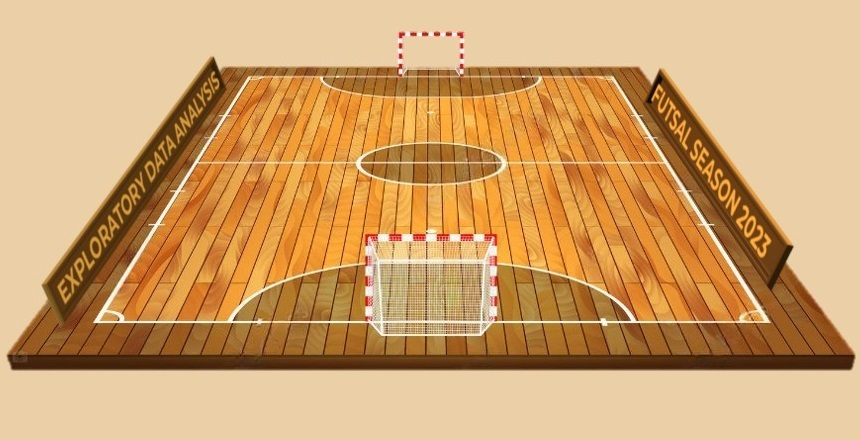
</div>     

<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">

<p style="background-color:#41210A; font-family:Montserrat; font-size:100%; text-align:left; border-radius:0px 10px 10px 0px; padding-left: 50px; width: 50%;"><strong><span style="color:#FBB03B">Clean Version</span></strong></p>
    

- **This is the clean version of the Exploratory Data Analysis (EDA). To improve the organization and clarity of the work, I have extracted the code for creating graphs and tables and placed it in a separate file ('auxiliary_functions.py') as functions, to be called when necessary.**
    
    
- **If you wish to see the version with the table and graph creation codes directly in the notebook, use the original file.**    
</div>        

<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">

## <p style="background-color:#41210A; font-family:Montserrat; color:#FBB03B; font-size:150%; text-align:left; margin-bottom: 0px; padding-left: 75px;"><strong>1. CONTEXT</strong></p>  
    

- **In recent years, I have participated in a weekly futsal game with a group of friends. In 2022, we decided to take the competition to the next level by introducing our first leaderboard, based solely on points. However, we realized the need to expand the amount of available data to explore it more comprehensively.**

    
- **It was in this context that I developed the website "omarcador.com," a platform that enables the cataloging and storage of key statistics from each match, providing a more comprehensive and enriching view of our matches.**

    
- **Collected Statistics:**
    
 - **Score**
    
 - **Game time**
    
 - **Goal history**
    
 - **Goal scorer**

 - **Goal Assistant**
    
 - **Time the goal was scored**
    
    
- **At the end of 2023, I present the exploratory analysis of the season's matches. This analysis aims to identify patterns, trends, and insights that can enhance our understanding of team and player performance, as well as enrich the competitive experience of our weekly matches.**
</div>          

<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">

## <p style="background-color:#41210A; font-family:Montserrat; color:#FBB03B; font-size:150%; text-align:left; margin-bottom: 0px; padding-left: 75px;"><strong>2. IMPORTING LIBRARIES</strong></p> 
    
- **Below are all the libraries used in this notebook. The version descriptions of the main libraries can be found in the file "00_package_versions.ipynb".**
</div>           

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display
import os
import style

<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">

## <p style="background-color:#41210A; font-family:Montserrat; color:#FBB03B; font-size:150%; text-align:left; margin-bottom: 0px; padding-left: 75px;"><strong>3. IMPORTING DATA</strong></p> 
    
- **Two datasets will be used in the analysis:**
    
<p style="background-color:#41210A; font-family:Montserrat; font-size:100%; text-align:left; border-radius:0px 10px 10px 0px; padding-left: 50px; width: 50%;"><strong><span style="color:#FBB03B">DataFrame "df"</span></strong></p>
    
- **In the DataFrame 'df', each row corresponds to a goal that occurred in a match throughout the year, with its characteristics described in the columns.**
    
    
- **I will import the file "Futsal 2023 - Gols.xlsx" and refer to it as "df".**
    
    
- **Each column in this file represents a goal and contains information on the date the goal was scored, the player who scored the goal, the player who assisted, the minute the goal was scored, and the score after the goal.**
    
    
- **Before visualizing the dataframe, I will translate the column names into English.**    
</div>        

In [2]:
# Read the Excel file with goals and assists
df = pd.read_excel('../data/Futsal 2023 - Goals.xlsx')

# Rename the columns
df.rename(columns={
    'Data': 'Date',
    'Goleador': 'Scorer',
    'Assistente': 'Assistant',
    'Minuto': 'Minute',
    'Placar': 'Score'
}, inplace=True)

# Display the first 5 rows of the dataframe
display(df.head(5))


,Date,Scorer,Assistant,Minute,Score
0,2023-02-28 00:00:00,Guerra,-,NaN,NaN
1,2023-02-28 00:00:00,Wagner,-,NaN,NaN
2,2023-02-28 00:00:00,Theo,Wagner,NaN,NaN
3,2023-02-28 00:00:00,Guerra,Vitor,NaN,NaN
4,2023-02-28 00:00:00,Bernard,-,NaN,NaN


<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">

<p style="background-color:#41210A; font-family:Montserrat; font-size:100%; text-align:left; border-radius:0px 10px 10px 0px; padding-left: 50px; width: 50%;"><strong><span style="color:#FBB03B">DataFrame  "df_vd"</span></strong></p>
    
- **- The DataFrame 'df_vd' corresponds to the set of players who participated in the match.**
</div>        

In [3]:
# Read the Excel file with winners and losers
df_vd = pd.read_excel('../data/Futsal 2023 - Wins and Losses.xlsx')

# Rename the columns
df_vd.rename(columns={
    'Data': 'Date',
    'Local': 'Location',
    'Time Vencedor': 'Winning Team',
    'Time Perdedor': 'Losing Team',
    'Time Empate 1': 'Draw Team 1',
    'Time Empate 2': 'Draw Team 2'
}, inplace=True)

# Display the first 5 rows of the dataframe
display(df_vd.head(5))

,Date,Location,Winning Team,Losing Team,Draw Team 1,Draw Team 2
0,2023-02-28,Colégio Bom Conselho,"Theo, Bernard, Wagner, Gabriel, Vitor, Guerra","Evandro, Fabio, Lucas, Jean, Matheus, Rafael, ...",NaN,NaN
1,2023-03-07,Colégio Bom Conselho,"Wagner, Hernan, Theo, Pietro, Fabio","Henrique, Rafael, Douglas, Bernard, Evandro",NaN,NaN
2,2023-03-14,Colégio Bom Conselho,"Thomas, Evandro, Fabio, Pietro, Wagner, Robson","Theo, Guerra, Bernard, Marcos, Vitor",NaN,NaN
3,2023-03-21,Colégio Bom Conselho,"Wagner, Fabio, Vitor, Guerra, Rodrigo Est, Mat...","Thomas, Evandro, Rafael, Bernard, Theo, Marcos",NaN,NaN
4,2023-03-28,Colégio Bom Conselho,"Evandro, Fabio, Wagner, Vitor, Gol. Henrique","Thomas, Gabriel, Marcos, Rodrigo Est, Lucas, B...",NaN,NaN


<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">

## <p style="background-color:#41210A; font-family:Montserrat; color:#FBB03B; font-size:150%; text-align:left; margin-bottom: 0px; padding-left: 75px;"><strong>4. SEASON 2023</strong></p> 
    
- **Now, let's explore some general information about the matches throughout the year 2023.**
</div>        

In [4]:
# Number of players
# List of columns to be checked
columns = ['Winning Team', 'Losing Team', 'Draw Team 1', 'Draw Team 2']

# Create a dictionary to store the number of matches each player participated in
players_matches = {}

# Iterate over the columns and count the occurrences of each player
for column in columns:
    players = df_vd[column].apply(lambda x: str(x).split(', ')).explode().tolist()
    
    for player in players:
        if player in players_matches:
            players_matches[player] += 1
        else:
            players_matches[player] = 1

# Remove the 'nan' key
if 'nan' in players_matches:
    players_matches.pop('nan')

# Number of matches
number_of_matches = len(df_vd)
print('{} matches were played during the year.\n'.format(number_of_matches))    

# Number of players
number_of_players = len(players_matches)
print('{} players participated in the matches in 2023.\n'.format(number_of_players))

# Number of locations
number_of_locations = len(df_vd['Location'].unique())
print('The matches were played at {} different futsal courts.\n'.format(number_of_locations))

# Number of goals
number_of_goals = len(df)
print('{} goals were scored throughout the year.'.format(number_of_goals))


42 matches were played during the year.

55 players participated in the matches in 2023.

The matches were played at 3 different futsal courts.

1110 goals were scored throughout the year.


<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">

## <p style="background-color:#41210A; font-family:Montserrat; color:#FBB03B; font-size:150%; text-align:left; margin-bottom: 0px; padding-left: 75px;"><strong>5. 2023 SEASON STANDING</strong></p> 
    
- **Now I will create a new dataframe to account for the number of wins, draws, and losses for each player.**

    
- **Using this data, I will calculate the final score and point efficiency based on the following information:**

 - **Win + 3 Points**
 - **Draw + 1 Point**
 - **Loss + 0 Points**

    
- **This information will be compiled into the 2023 Season Standings.**
</div>        

In [5]:
# Create a new DataFrame with players and the number of matches
df_players = pd.DataFrame(list(players_matches.items()), columns=['Player', 'Matches'])

# Display the new DataFrame
df_players.head(5)

,Player,Matches
0,Theo,10
1,Bernard,34
2,Wagner,30
3,Gabriel,37
4,Vitor,14


In [6]:
# Create a dictionary to store the number of wins for each player
players_wins = {}
# Create a dictionary to store the number of losses for each player
players_losses = {}
# Create a dictionary to store the number of draws for each player
players_draws = {}

# Iterate over the columns and count the occurrences of each player in wins
for column in columns:
    # Check if the column is "Winning Team"
    if column == 'Winning Team':
        players = df_vd[column].apply(lambda x: str(x).split(', ')).explode().tolist()
        
        for player in players:
            if player in players_wins:
                players_wins[player] += 1
            else:
                players_wins[player] = 1
    # Check if the column is "Losing Team"
    elif column == 'Losing Team':
        players = df_vd[column].apply(lambda x: str(x).split(', ')).explode().tolist()
        
        for player in players:
            if player in players_losses:
                players_losses[player] += 1
            else:
                players_losses[player] = 1           

    # Check if the column contains "Draw"
    elif 'Draw' in column:
        players = df_vd[column].apply(lambda x: str(x).split(', ')).explode().tolist()
        
        for player in players:
            if player in players_draws:
                players_draws[player] += 1
            else:
                players_draws[player] = 1 
                
# Create the "Wins" column in the df_players DataFrame
df_players['Wins'] = df_players['Player'].map(players_wins).fillna(0).astype(int)

# Create the "Losses" column in the df_players DataFrame
df_players['Losses'] = df_players['Player'].map(players_losses).fillna(0).astype(int)

# Create the "Draws" column in the df_players DataFrame
df_players['Draws'] = df_players['Player'].map(players_draws).fillna(0).astype(int)

# Create the "Points" column in the df_players DataFrame
df_players['Points'] = df_players['Wins'] * 3 + df_players['Draws']

# Calculate the "Efficiency" column in the df_players DataFrame
df_players['Efficiency'] = (df_players['Points'] / (df_players['Matches'] * 3)) * 100
df_players['Efficiency'] = df_players['Efficiency'].map('{:.2f}%'.format)

# Use the drop method to remove the 'nan' row
df_players = df_players.drop(df_players[df_players['Player'] == 'nan'].index)

# Sort the DataFrame based on the "Points" column in descending order
df_players = df_players.sort_values(by='Points', ascending=False)

# Create the "Position" column
df_players.insert(0, 'Position', range(1, len(df_players) + 1))

# Display the new DataFrame
df_players.head(5)

,Position,Player,Matches,Wins,Losses,Draws,Points,Efficiency
8,1,Fabio,39,21,14,4,67,57.26%
2,2,Wagner,30,21,7,2,65,72.22%
9,3,Thomas,39,17,18,4,55,47.01%
25,4,Thomas Berg,28,14,11,3,45,53.57%
3,5,Gabriel,37,13,20,4,43,38.74%


In [7]:
# Creating new excel file for Season Standings
df_players.to_excel('../data/Season Standing.xlsx', index=False)

<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">

<p style="background-color:#41210A; font-family:Montserrat; font-size:100%; text-align:left; border-radius:0px 10px 10px 0px; padding-left: 50px; width: 50%;"><strong><span style="color:#FBB03B">Season Standings Presentation</span></strong></p>
    
- **Since this is a table with 55 players, I chose to create an image to better highlight each player’s information, line by line.**
    
</div>        

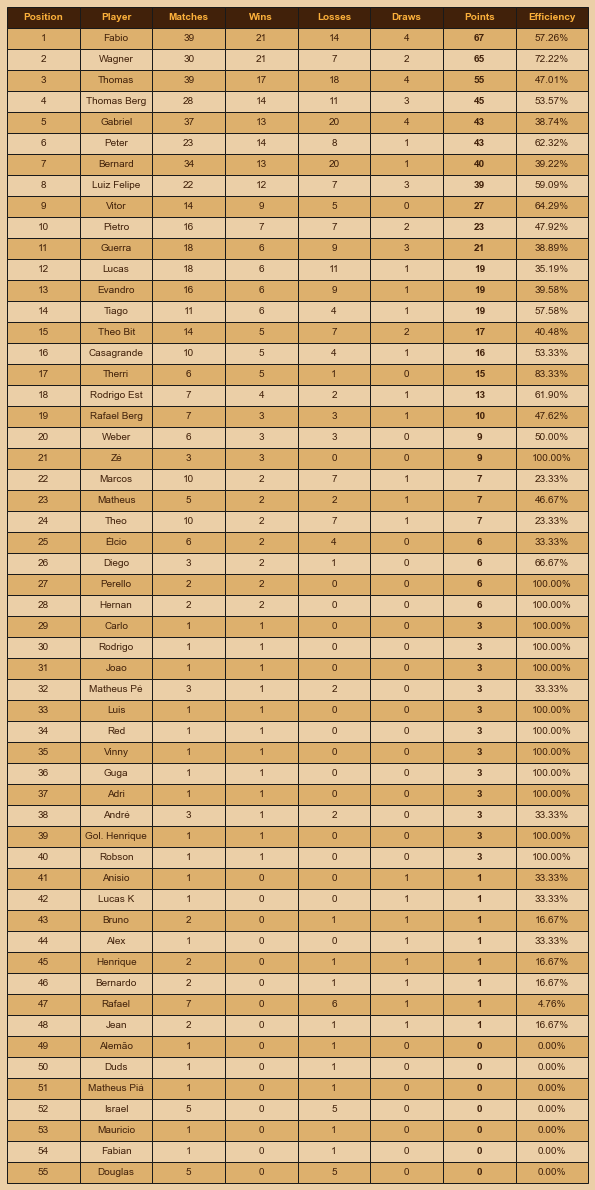

In [8]:
from auxiliary_functions import plot_season_standings_table

plot_season_standings_table(df_players)

<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">

<p style="background-color:#41210A; font-family:Montserrat; font-size:100%; text-align:left; border-radius:0px 10px 10px 0px; padding-left: 50px; width: 50%;"><strong><span style="color:#FBB03B">Championship Points Progression Throughout the Year</span></strong></p>
    
- **I have chosen the top 15 players in the standings to plot their individual point progression from the first to the last game of the 2023 season.**
    
</div>        

In [9]:
# Select only the top 15 players to graphically analyze the score evolution
top_15_players = df_players.head(15)
player_names = top_15_players['Player'].tolist()
print(player_names)

['Fabio', 'Wagner', 'Thomas', 'Thomas Berg', 'Gabriel', 'Peter', 'Bernard', 'Luiz Felipe', 'Vitor', 'Pietro', 'Guerra', 'Lucas', 'Evandro', 'Tiago', 'Theo Bit']


In [10]:
# 1. Prepare the data
df_vd['Date'] = pd.to_datetime(df_vd['Date'])
df_vd.sort_values(by='Date', inplace=True)

# 2. Create a column for each player with an initial score of 0
for player in player_names:
    df_vd[player + '_points'] = 0

# 3. Update the players' scores for each row
def update_score(row):
    for player in player_names:
        if pd.notna(row['Winning Team']) and player in row['Winning Team'].split(', '):
            df_vd.at[row.name, player + '_points'] += 3
        elif pd.notna(row['Losing Team']) and player in row['Losing Team'].split(', '):
            df_vd.at[row.name, player + '_points'] += 0  # No need to add points for a loss, as they start with 0
        elif pd.notna(row['Draw Team 1']) and player in row['Draw Team 1'].split(', '):
            df_vd.at[row.name, player + '_points'] += 1
        elif pd.notna(row['Draw Team 2']) and player in row['Draw Team 2'].split(', '):
            df_vd.at[row.name, player + '_points'] += 1

df_vd.apply(update_score, axis=1)

# 4. Cumulative sum of points
for player in player_names:
    df_vd[player + '_points'] = df_vd[player + '_points'].cumsum()

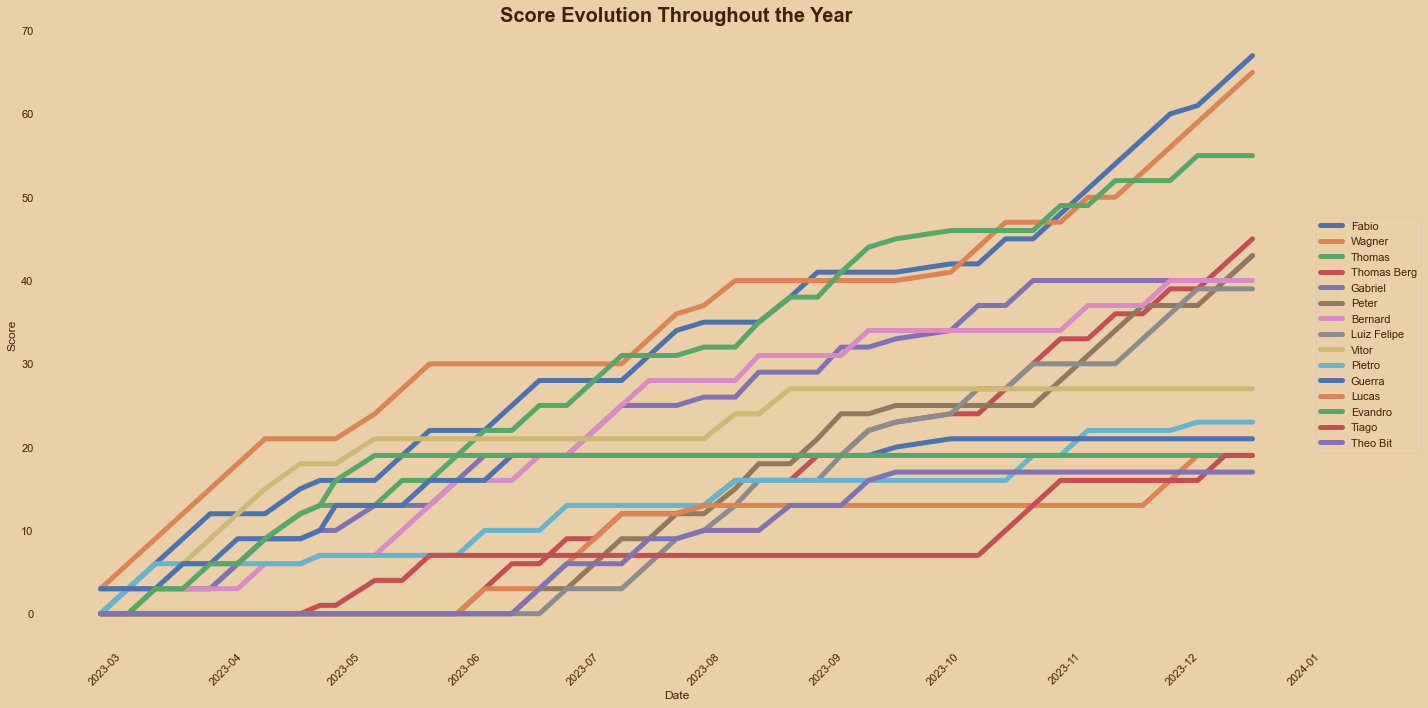

In [11]:
from auxiliary_functions import plot_points_evolution

plot_points_evolution(df_vd, player_names)

<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">

## <p style="background-color:#41210A; font-family:Montserrat; color:#FBB03B; font-size:150%; text-align:left; margin-bottom: 0px; padding-left: 75px;"><strong>6. SCORERS AND ASSIST PROVIDERS</strong></p> 
    
- **In this section, the individual performance of players in decisive actions during the match will be analyzed, including goals and the last decisive pass that enables another player to score a goal, known as an assist.**
    
<p style="background-color:#41210A; font-family:Montserrat; font-size:100%; text-align:left; border-radius:0px 10px 10px 0px; padding-left: 50px; width: 50%;"><strong><span style="color:#FBB03B">Top Scorers Table Year</span></strong></p>
    
- **I will plot the top goal scorers of the year, applying a minimum criterion of more than 10 goals to keep the graph concise.**
</div>        

In [12]:
# List of all players
all_players = df_players['Player'].tolist()

# Count occurrences of each player in the 'Scorer' column
df_scorer = df['Scorer'].value_counts()

# Convert the resulting series into a DataFrame
df_scorer = df_scorer.reset_index()

# Rename the columns of the new DataFrame
df_scorer.columns = ['Player', 'Goals']

# Merge the two DataFrames based on the 'Player' column
df_merge = pd.merge(df_scorer, df_players, on='Player', how='right')

# Fill NaN with 0
df_merge['Goals'].fillna(0, inplace=True)

# Calculate the average and add the 'Average' column to df_merge
df_merge['Average'] = (df_merge['Goals'] / df_merge['Matches'])
df_merge['Average'] = df_merge['Average'].round(2)  # Round to 2 decimal places

# Sort the DataFrame based on the 'Goals' column in descending order
df_merge = df_merge.sort_values(by='Goals', ascending=False)

# Add the 'Position' column
df_merge['Position'] = range(1, len(df_merge) + 1)

# Round the 'Goals' column to an integer
df_merge['Goals'] = df_merge['Goals'].astype(int)

# Reorder the columns
df_scorer = df_merge[['Position', 'Player', 'Matches', 'Goals', 'Average']]

# Convert the resulting series into a DataFrame
df_scorer = df_scorer.reset_index()
df_scorer = df_scorer.drop(columns=['index'])

df_scorer.to_excel('../data/Top Scorers Table.xlsx', index=False)

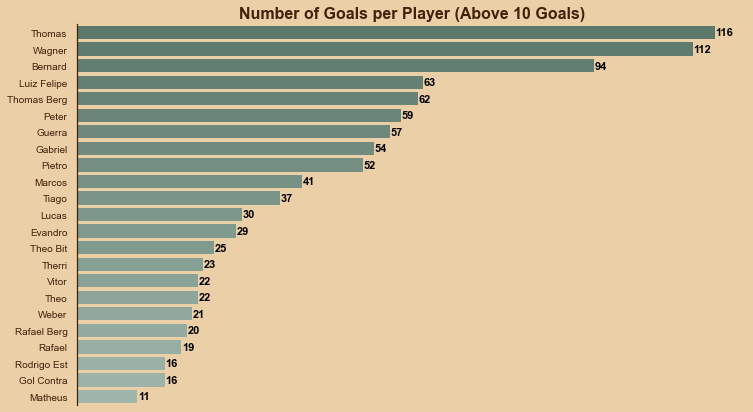

In [13]:
from auxiliary_functions import plot_goal_scorers

plot_goal_scorers(df)

<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">

- **One important point to highlight is that both the values in the top scorers' graph and the upcoming assist leaders' graph are absolute numbers. The players do not have the same number of matches played, which directly affects the number of goals scored throughout the year.**
</div>        

<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">

<p style="background-color:#41210A; font-family:Montserrat; font-size:100%; text-align:left; border-radius:0px 10px 10px 0px; padding-left: 50px; width: 50%;"><strong><span style="color:#FBB03B">Top Assistants Table of the Year</span></strong></p>
    
- **I will apply the same process and criteria used in the previous graph to create a chart for the players who provided the most assists for goals.**
</div>    

In [14]:
# List of all players
all_players = df_players['Player'].tolist()

# Filter the DataFrame to remove assistants with "-"
df_assistants = df[df['Assistant'] != '-']

# Count occurrences of each assistant in the 'Assistant' column
assistant_counts = df_assistants['Assistant'].value_counts()

# Convert the resulting series to a DataFrame
df_assistants = assistant_counts.reset_index()

# Rename the columns of the new DataFrame
df_assistants.columns = ['Player', 'Assists']

# Merge the two DataFrames based on the "Player" column
df_merge = pd.merge(df_assistants, df_players, on='Player', how='right')

# Fill NaN with 0
df_merge['Assists'].fillna(0, inplace=True)

# Calculate the average and add the "Average" column to df_merge
df_merge['Average'] = (df_merge['Assists'] / df_merge['Matches']) 
df_merge['Average'] = df_merge['Average'].round(2)  # Round to 2 decimal places

# Sort the DataFrame based on the "Assists" column in descending order
df_merge = df_merge.sort_values(by='Assists', ascending=False)

# Add the position column
df_merge['Position'] = range(1, len(df_merge) + 1)

# Round to an integer
df_merge['Assists'] = df_merge['Assists'].astype(int)

# Reorder the columns
df_assistants = df_merge[['Position', 'Player', 'Matches', 'Assists', 'Average']]

# Convert the resulting series to a DataFrame
df_assistants = df_assistants.reset_index()
df_assistants = df_assistants.drop(columns=['index'])

df_assistants.to_excel('../data/Top Assistants Table.xlsx', index=False)

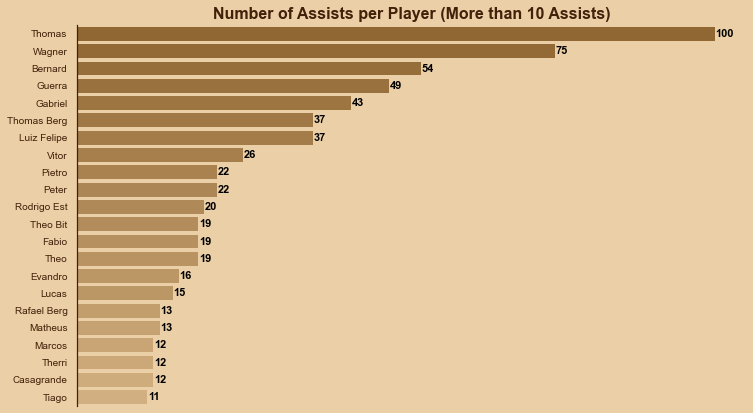

In [15]:
from auxiliary_functions import plot_assist_leaders

plot_assist_leaders(assistant_counts)

<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">

<p style="background-color:#41210A; font-family:Montserrat; font-size:100%; text-align:left; border-radius:0px 10px 10px 0px; padding-left: 50px; width: 50%;"><strong><span style="color:#FBB03B">Top Scorers and Assistants Table</span></strong></p>
    
- **Now that we have visualized the top scorers and assist leaders in total numbers, I will create a table to analyze the individual performance of each player in these two categories. This table will not only show the total number of goals and assists but also include the number of games played and the average of these statistics per game, providing context to the values presented in the previous charts.**
   
    
- **Just as I did with the points tables, I will create an image with two tables for better visualization of their content.**    
</div>        

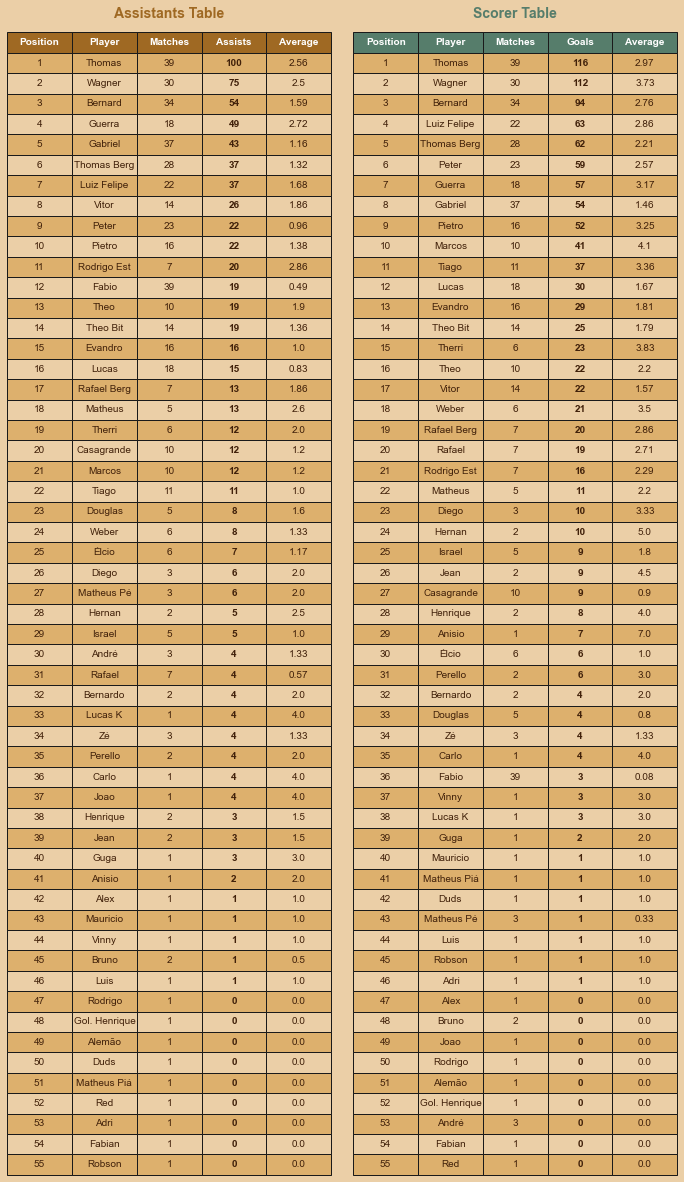

In [16]:
from auxiliary_functions import plot_assistants_scorers_tables

plot_assistants_scorers_tables(df_assistants, df_scorer)

<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">

<p style="background-color:#41210A; font-family:Montserrat; font-size:100%; text-align:left; border-radius:0px 10px 10px 0px; padding-left: 50px; width: 50%;"><strong><span style="color:#FBB03B">Goals and Assists Distribution by Matches</span></strong></p>
    
- **I will use scatter plots to analyze how goals and assists vary with the number of matches played. These plots help identify patterns and trends in player performance.**

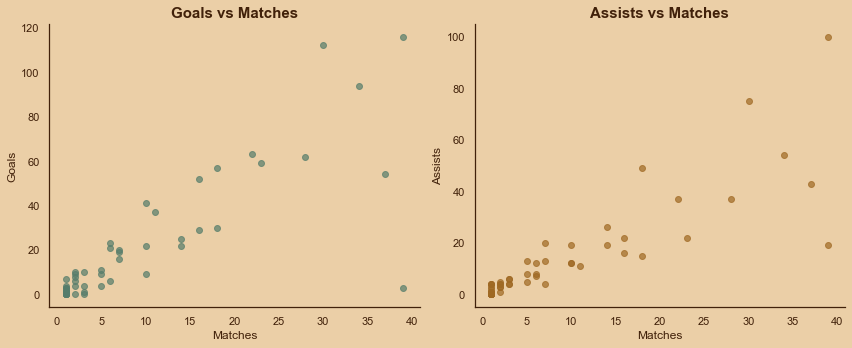

In [17]:
from auxiliary_functions import plot_goals_assists

plot_goals_assists(df_scorer, df_assistants)

<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">

## <p style="background-color:#41210A; font-family:Montserrat; color:#FBB03B; font-size:150%; text-align:left; margin-bottom: 0px; padding-left: 75px;"><strong>7. ANALYSIS OF MATCH LOCATIONS</strong></p> 
    
- **We know that 42 matches were played throughout the year 2023. In this section, I will explore data regarding the fields where these matches took place.**
    
    
- **I will create a new dataframe to plot the data related to the locations of the matches.**    
    
<p style="background-color:#41210A; font-family:Montserrat; font-size:100%; text-align:left; border-radius:0px 10px 10px 0px; padding-left: 50px; width: 50%;"><strong><span style="color:#FBB03B">Checking the number of matches per location</span></strong></p>      
</div>        

In [18]:
# Number of matches per venue
venue_counts = df_vd['Location'].value_counts()

# Display the result
venue_counts

Clube Geraldo Santana     26
Colégio Bom Conselho      15
Quadra Sintética PUCRS     1
Name: Location, dtype: int64

<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">
 
<p style="background-color:#41210A; font-family:Montserrat; font-size:100%; text-align:left; border-radius:0px 10px 10px 0px; padding-left: 50px; width: 50%;"><strong><span style="color:#FBB03B">Creating new dataframe or locations</span></strong></p>      
</div>    

In [19]:
# Merging Goal and Venue Information

# Date time
df_vd['Date'] = pd.to_datetime(df_vd['Date'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Creating new df
df_venues = df[['Date']].merge(df_vd[['Date', 'Location']], on='Date')

# Group by Date and Venue, counting the number of occurrences in each group
df_venue_counts = df_venues.groupby(['Date', 'Location']).size().reset_index(name='Number of Goals')

# Display the new DataFrame
df_venue_counts.head(5)

,Date,Location,Number of Goals
0,2023-02-28,Colégio Bom Conselho,39
1,2023-03-07,Colégio Bom Conselho,27
2,2023-03-14,Colégio Bom Conselho,25
3,2023-03-21,Colégio Bom Conselho,37
4,2023-03-28,Colégio Bom Conselho,22


In [20]:
# Group by Venue and sum the number of goals in each group
df_sum_goals_venues = df_venue_counts.groupby('Location')['Number of Goals'].sum().reset_index(name='Total Goals')

# Display the new DataFrame
df_sum_goals_venues

# Add the 'Number of Matches' column to the df_sum_goals_venues DataFrame
df_sum_goals_venues['Number of Matches'] = df_sum_goals_venues['Location'].map(venue_counts)

# Display the resulting DataFrame
df_sum_goals_venues['Average'] = df_sum_goals_venues['Total Goals'] / df_sum_goals_venues['Number of Matches']
df_sum_goals_venues


,Location,Total Goals,Number of Matches,Average
0,Clube Geraldo Santana,648,26,24.923077
1,Colégio Bom Conselho,442,15,29.466667
2,Quadra Sintética PUCRS,20,1,20.000000


<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">
 
<p style="background-color:#41210A; font-family:Montserrat; font-size:100%; text-align:left; border-radius:0px 10px 10px 0px; padding-left: 50px; width: 50%;"><strong><span style="color:#FBB03B">Plotting Charts</span></strong></p>
</div>        

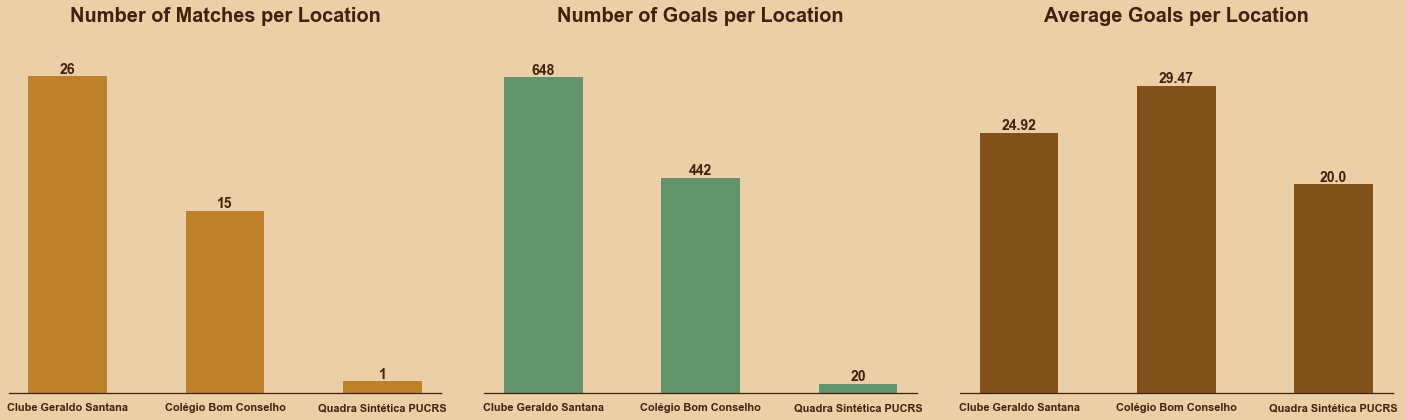

In [21]:
from auxiliary_functions import plot_goals_per_location

plot_goals_per_location(df_sum_goals_venues)

<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">

## <p style="background-color:#41210A; font-family:Montserrat; color:#FBB03B; font-size:150%; text-align:left; margin-bottom: 0px; padding-left: 75px;"><strong>8. MONTHLY TOP PLAYERS</strong></p> 
    
- **Throughout the year, it was observed that only a few participants were involved in most of the matches, while some players only participated for a few weeks. Given this variation in engagement, I plan to develop a monthly ranking that highlights performance in points, goals, and assists, providing a more detailed analysis of player performance during these specific periods.**
      
    
<p style="background-color:#41210A; font-family:Montserrat; font-size:100%; text-align:left; border-radius:0px 10px 10px 0px; padding-left: 50px; width: 50%;"><strong><span style="color:#FBB03B">Creating new DataFrame for Monthly Points</span></strong></p>      
</div>    


In [22]:
# Convert all lines to datetime format
df_vd['Date'] = pd.to_datetime(df_vd['Date'], errors='coerce')

# Create Month column
df_vd['Month'] = df_vd['Date'].dt.month

In [23]:
# Create an empty DataFrame to store the results
df_result = pd.DataFrame(columns=['Player', 'N_Wins', 'N_Losses', 'N_Draws', 'Month'])

# Iterate over the rows of the original DataFrame
for _, row in df_vd.iterrows():
    month = row['Month']
    
    # Separate the players from the 'Winning Team' column
    if pd.notna(row['Winning Team']):
        winners = row['Winning Team'].split(', ')
        for player in winners:
            player = player.strip()
            # Check if the player is already in the result DataFrame
            if player not in df_result['Player'].values:
                new_player = pd.DataFrame({'Player': [player], 'N_Wins': [1], 'N_Losses': [0], 'N_Draws': [0], 'Month': [month]})
                df_result = pd.concat([df_result, new_player], ignore_index=True)
            else:
                idx = df_result.index[(df_result['Player'] == player) & (df_result['Month'] == month)]
                if not idx.empty:
                    df_result.at[idx[0], 'N_Wins'] += 1
                else:
                    new_player = pd.DataFrame({'Player': [player], 'N_Wins': [1], 'N_Losses': [0], 'N_Draws': [0], 'Month': [month]})
                    df_result = pd.concat([df_result, new_player], ignore_index=True)

    # Separate the players from the 'Losing Team' column
    if pd.notna(row['Losing Team']):
        losers = row['Losing Team'].split(', ')
        for player in losers:
            player = player.strip()
            # Check if the player is already in the result DataFrame
            if player not in df_result['Player'].values:
                new_player = pd.DataFrame({'Player': [player], 'N_Wins': [0], 'N_Losses': [1], 'N_Draws': [0], 'Month': [month]})
                df_result = pd.concat([df_result, new_player], ignore_index=True)
            else:
                idx = df_result.index[(df_result['Player'] == player) & (df_result['Month'] == month)]
                if not idx.empty:
                    df_result.at[idx[0], 'N_Losses'] += 1
                else:
                    new_player = pd.DataFrame({'Player': [player], 'N_Wins': [0], 'N_Losses': [1], 'N_Draws': [0], 'Month': [month]})
                    df_result = pd.concat([df_result, new_player], ignore_index=True)

    # Separate the players from the 'Draw Team 1' and 'Draw Team 2' columns
    for column in ['Draw Team 1', 'Draw Team 2']:
        if pd.notna(row[column]):
            draws = row[column].split(', ')
            for player in draws:
                player = player.strip()
                # Check if the player is already in the result DataFrame
                if player not in df_result['Player'].values:
                    new_player = pd.DataFrame({'Player': [player], 'N_Wins': [0], 'N_Losses': [0], 'N_Draws': [1], 'Month': [month]})
                    df_result = pd.concat([df_result, new_player], ignore_index=True)
                else:
                    idx = df_result.index[(df_result['Player'] == player) & (df_result['Month'] == month)]
                    if not idx.empty:
                        df_result.at[idx[0], 'N_Draws'] += 1
                    else:
                        new_player = pd.DataFrame({'Player': [player], 'N_Wins': [0], 'N_Losses': [0], 'N_Draws': [1], 'Month': [month]})
                        df_result = pd.concat([df_result, new_player], ignore_index=True)

# Display the result DataFrame
df_result.head(5)

,Player,N_Wins,N_Losses,N_Draws,Month
0,Theo,1,0,0,2
1,Bernard,1,0,0,2
2,Wagner,1,0,0,2
3,Gabriel,1,0,0,2
4,Vitor,1,0,0,2


<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">
    
<p style="background-color:#41210A; font-family:Montserrat; font-size:100%; text-align:left; border-radius:0px 10px 10px 0px; padding-left: 50px; width: 50%;"><strong><span style="color:#FBB03B">Creating new Dataframe for Monthly Goals and Assists</span></strong></p>      
</div>        

In [24]:
# Convert all rows to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Create Month column
df['Month'] = df['Date'].dt.month

In [25]:
# Group the original DataFrame by month, 'Scorers', and 'Assists', counting the occurrences
grouped_scorers_df = df.groupby(['Month', 'Scorer']).size().reset_index(name='Goals')

# Rename the 'Scorer' column to 'Player'
grouped_scorers_df = grouped_scorers_df.rename(columns={'Scorer': 'Player'})

# Group the original DataFrame by month, 'Assists', and 'Scorers', counting the occurrences
grouped_assists_df = df.groupby(['Month', 'Assistant']).size().reset_index(name='Assists')

# Rename the 'Assistant' column to 'Player'
grouped_assists_df = grouped_assists_df.rename(columns={'Assistant': 'Player'})

# Merge the two DataFrames using 'Month' and 'Player' as the join keys
df_month_geo = pd.merge(grouped_scorers_df, grouped_assists_df, on=['Month', 'Player'], how='outer')

# Replace NaN values with 0
df_month_geo = df_month_geo.fillna(0)

# Display the resulting DataFrame
df_month_geo.head(5)

,Month,Player,Goals,Assists
0,2,Bernard,2.0,0.0
1,2,Bernardo,3.0,3.0
2,2,Evandro,3.0,1.0
3,2,Gabriel,3.0,0.0
4,2,Guerra,2.0,5.0


<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">
    
<p style="background-color:#41210A; font-family:Montserrat; font-size:100%; text-align:left; border-radius:0px 10px 10px 0px; padding-left: 50px; width: 50%;"><strong><span style="color:#FBB03B">Merging DataFrames</span></strong></p>     
</div>        

In [26]:
# Merge the DataFrames using the 'Player' and 'Month' columns
df_final = pd.merge(df_result, df_month_geo, on=['Month', 'Player'], how='outer')

# Replace NaN values with 0
df_final = df_final.fillna(0)

# Drop rows where the player is "-" or "Own Goal"
df_final = df_final.drop(df_final[df_final['Player'] == "-"].index)
df_final = df_final.drop(df_final[df_final['Player'] == "Own Goal"].index)

# Convert 'Month', 'Goals', and 'Assists' columns to integers
df_final['Month'] = df_final['Month'].astype(int)
df_final['Goals'] = df_final['Goals'].astype(int)
df_final['Assists'] = df_final['Assists'].astype(int)

# Sort the DataFrame by month
df_final = df_final.sort_values(by='Month')

# Calculate the 'Games' and 'Points' columns directly
df_final['Games'] = df_final['N_Wins'] + df_final['N_Losses'] + df_final['N_Draws']
df_final['Points'] = df_final['N_Wins'] * 3 + df_final['N_Draws']
df_final['Efficiency'] = ((df_final['Points'] / (df_final['Games'] * 3)) * 100)

df_final['Goals Average'] = (df_final['Goals'] / df_final['Games']).round(2)
df_final['Assists Average'] = (df_final['Assists'] / df_final['Games']).round(2)

# Format the 'Efficiency' column as a percentage
df_final['Efficiency'] = df_final['Efficiency'].apply(lambda x: f'{x:.2f}%')

# Define the desired order of columns
column_order = ['Player', 'Month', 'Games', 'Points', 'Efficiency', 'Goals', 'Assists', 'Goals Average', 'Assists Average']

# Reorder the columns in the DataFrame
df_final = df_final[column_order]

# Reset the index after removal and sorting
df_final = df_final.reset_index(drop=True)

# Display the resulting DataFrame
df_final.head(5)


C:\Users\thoma\anaconda33\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)


,Player,Month,Games,Points,Efficiency,Goals,Assists,Goals Average,Assists Average
0,Theo,2,1,3,100.00%,5,3,5.0,3.0
1,Bernardo,2,1,0,0.00%,3,3,3.0,3.0
2,Matheus,2,1,0,0.00%,1,4,1.0,4.0
3,Jean,2,1,0,0.00%,9,3,9.0,3.0
4,Lucas,2,1,0,0.00%,3,2,3.0,2.0


<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">
    
<p style="background-color:#41210A; font-family:Montserrat; font-size:100%; text-align:left; border-radius:0px 10px 10px 0px; padding-left: 50px; width: 50%;"><strong><span style="color:#FBB03B">Adjusting Data</span></strong></p> 
    
- **At this stage, I will select a specific month to plot the tables for points, goals, and assists. I will adjust the data to make this possible**   
</div>        

In [27]:
months_eng = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 
              9: 'September', 10: 'October', 11: 'November', 12: 'December'}

selected_month = 4

# Filter the DataFrame to include only rows corresponding to the selected month
df_month = df_final[df_final['Month'] == selected_month]

# Sort the DataFrame by the number of points in descending order
df_month = df_month.sort_values(by='Points', ascending=False)

# Reset the index after sorting to get the position
df_month = df_month.reset_index(drop=True)

# Add a position column
df_month['Position'] = df_month.index + 1

# Select only the top 10 players
df_month = df_month.head(10)

# Select the desired columns
table_month = df_month[['Position', 'Player', 'Points', 'Games', 'Efficiency']]

# Filter the goals DataFrame for the selected month
df_goals_month = df_final[df_final['Month'] == selected_month]

# Sort the goals DataFrame by the number of goals in descending order
df_goals_month = df_goals_month.sort_values(by='Goals', ascending=False)

# Reset the index after sorting to get the position
df_goals_month = df_goals_month.reset_index(drop=True)

# Add a position column
df_goals_month['Position'] = df_goals_month.index + 1

# Select only the top 10 players
df_goals_month = df_goals_month.head(10)

# Select the desired columns
table_goals_month = df_goals_month[['Position', 'Player', 'Goals', 'Games', 'Goals Average']]

# Filter the assists DataFrame for the selected month
df_assists_month = df_final[df_final['Month'] == selected_month]

# Sort the assists DataFrame by the number of assists in descending order
df_assists_month = df_assists_month.sort_values(by='Assists', ascending=False)

# Reset the index after sorting to get the position
df_assists_month = df_assists_month.reset_index(drop=True)

# Add a position column
df_assists_month['Position'] = df_assists_month.index + 1

# Select only the top 10 players
df_assists_month = df_assists_month.head(10)

# Select the desired columns
table_assists_month = df_assists_month[['Position', 'Player', 'Assists', 'Games', 'Assists Average']]


<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">
    
<p style="background-color:#41210A; font-family:Montserrat; font-size:100%; text-align:left; border-radius:0px 10px 10px 0px; padding-left: 50px; width: 50%;"><strong><span style="color:#FBB03B">Plotting the Table</span></strong></p> 
</div>        

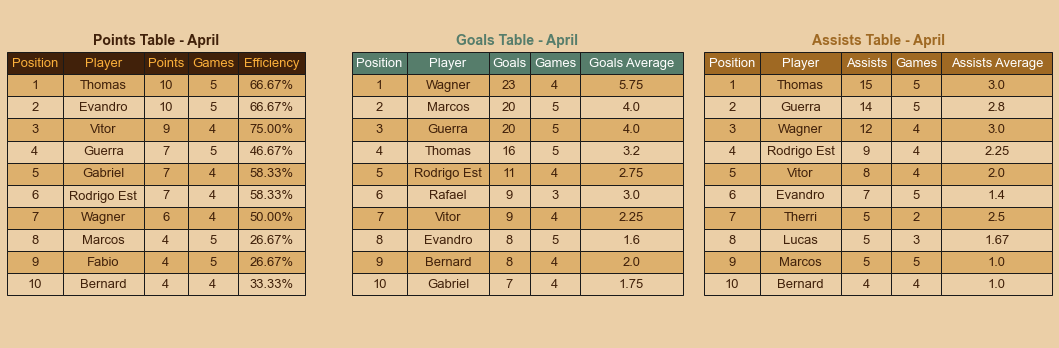

In [28]:
from auxiliary_functions import plot_monthly_tables

plot_monthly_tables(table_month, table_goals_month, table_assists_month, months_eng, selected_month)

<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">

## <p style="background-color:#41210A; font-family:Montserrat; color:#FBB03B; font-size:150%; text-align:left; margin-bottom: 0px; padding-left: 75px;"><strong>9. GOALS ANALYSIS</strong></p> 
    
- **A total of 1110 goals were scored throughout 2023. Let's delve deeper into the analysis of these goals.**
      
    
<p style="background-color:#41210A; font-family:Montserrat; font-size:100%; text-align:left; border-radius:0px 10px 10px 0px; padding-left: 50px; width: 50%;"><strong><span style="color:#FBB03B">Total Matches X Goals per Month</span></strong></p> 

- **In the initial charts, we will examine the total number of matches and goals scored per month to provide context. In the subsequent chart, we will calculate the average number of goals scored per month.**
</div>        

In [29]:
# Dictionary mapping English month names to Portuguese abbreviations
months_eng = {
    'January': 'Jan',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Apr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Aug',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dec'
}

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Group by month and count the number of unique values in the 'Date' column
count_per_month = df.groupby(df['Date'].dt.to_period("M")).agg({'Date': 'nunique'})

# Transform the count into a list
games_per_month = count_per_month['Date'].to_list()

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Create a 'Count' column with value 1 for each row
df['Count'] = 1

# Group by month and sum the 'Count' column
sum_per_month = df.groupby(df['Date'].dt.to_period("M")).agg({'Count': 'sum'})

# Transform the sum into a list
goals_per_month = sum_per_month['Count'].to_list()

# Month names in Portuguese
months_pt = [months_eng[month] for month in count_per_month.index.astype('datetime64[M]').month_name()]

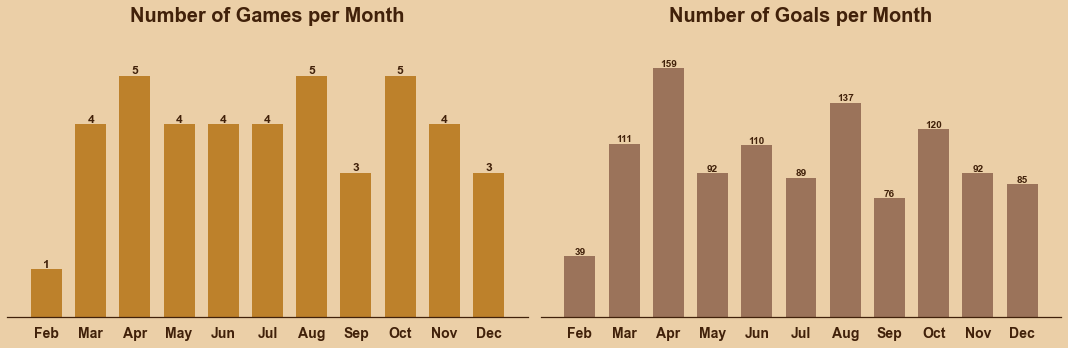

In [30]:
from auxiliary_functions import plot_games_goals_month

plot_games_goals_month(months_pt,goals_per_month, games_per_month)

<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">      
    
<p style="background-color:#41210A; font-family:Montserrat; font-size:100%; text-align:left; border-radius:0px 10px 10px 0px; padding-left: 50px; width: 50%;"><strong><span style="color:#FBB03B">Average Goals per Month</span></strong></p> 

- **Now that we have an understanding of the distribution of goals and matches throughout the months, let's examine the monthly average of goals scored during 2023.**
</div>    

In [31]:
# Calculate the average goals per game
average_goals_per_game = [goals / games for goals, games in zip(goals_per_month, games_per_month)]

# Define month abbreviations in Portuguese
months_pt = ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

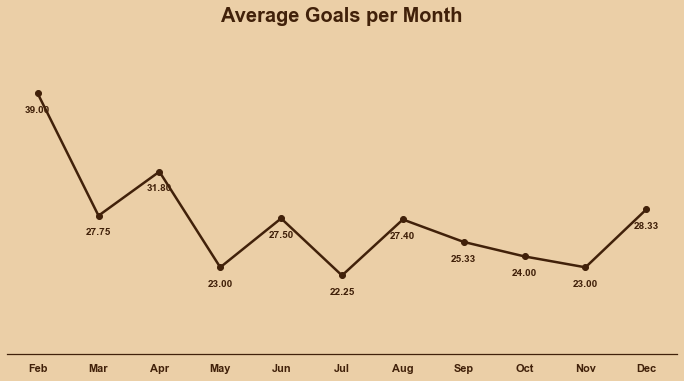

In [32]:
from auxiliary_functions import plot_average_goals_month

plot_average_goals_month(months_pt, average_goals_per_game)

<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">      
    
<p style="background-color:#41210A; font-family:Montserrat; font-size:100%; text-align:left; border-radius:0px 10px 10px 0px; padding-left: 50px; width: 50%;"><strong><span style="color:#FBB03B">Goal Characteristics Analysis</span></strong></p> 


- **Before beginning the analysis of goal characteristics, we need to make some adjustments to the dataframe because there are three games where the "Score" and "Minute" columns are not recorded. Therefore, these games do not qualify for analysis and will be excluded:**

    
- **02/28/2023 and 07/03/2023: Game information was recorded on paper while "O Marcador" was still in development. Only the goal scorers were noted, leaving the rest of the information incomplete.**
    
    
- **09/05/2023: Data was lost due to the need for a new functionality to prevent data loss on the "O Marcador" website, which was implemented the following week.**
</div>        

In [33]:
# Identify dates with missing values in the 'Score' column
df.loc[df['Score'].isna(), 'Date'].unique()

array(['2023-02-28T00:00:00.000000000', '2023-03-07T00:00:00.000000000',
       '2023-05-09T00:00:00.000000000'], dtype='datetime64[ns]')

In [34]:
# Drop rows with missing values in the 'Score' column
df = df.dropna(subset=['Score'])

# Replace "x" with "-"
df['Score'] = df['Score'].str.replace('x', '-')

<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">      
     

- **In football, although all goals are worth the same number of points (1), their impact on the game can vary significantly. For instance, consider the following scenario: if a match ends with a score of 2-2 and a goal is scored to make it 3-2, that goal has a substantial impact. Conversely, if a team is already leading 4-0 and scores another goal to make it 5-0, that goal has less impact on the outcome.**

    
- **Based on this concept, I have classified goals into five categories to better understand their impact:**

    
- **Equalizing Goal: A goal that levels the score.**
- **Tiebreaker Goal: A goal that breaks a tie and gives one team the lead.**
- **Advantage Goal: A goal that increases the lead of your team over the opponent.**
- **Reduction Goal: A goal that reduces the opponent's lead.**
- **Turning Goal: A goal that changes the result of the match, making the team that was losing take the lead.**
</div>        

In [35]:
# Split the 'Score' column into two columns for subtraction
df['Team A'] = df['Score'].str.split('-').str[0]
df['Team B'] = df['Score'].str.split('-').str[1]

# Convert to integers
df['Team A'] = df['Team A'].astype(int)
df['Team B'] = df['Team B'].astype(int)

# Create Result Column
df['Result'] = df['Team A'] - df['Team B']
df['Difference'] = df['Result'].abs()  # Use the absolute difference

# Create "Last Ahead" Column
df.loc[df['Result'] > 0, 'Last Ahead'] = 'Team A'
df.loc[df['Result'] < 0, 'Last Ahead'] = 'Team B'
df['Last Ahead'] = df['Last Ahead'].fillna(method='ffill')  # Carry forward the result from the previous cell (last team to be ahead)

# Mark the first row of each new date as Tiebreaker Goal
df['New Date'] = df['Date'] != df['Date'].shift(1)
df.loc[df['New Date'], 'Goal Type'] = 'Tiebreaker Goal'
# Remove the 'New Date' column if it's no longer needed
df = df.drop(columns=['New Date'])

# Create Goal Type Column

# Tied Goal - When Result = 0
df.loc[df['Result'] == 0, 'Goal Type'] = 'Equalizing Goal'

# Advantage Goal
df.loc[(df['Difference'] > 1) & (df['Difference'].diff() > 0), 'Goal Type'] = 'Advantage Goal'

# Conceded Goal
df.loc[(df['Difference'] > 0) & (df['Difference'].diff() < 0), 'Goal Type'] = 'Reduction Goal'

# Tiebreaker Goal
df.loc[((df['Result'] == 1) | (df['Result'] == -1)) & (df['Result'].shift(1) == 0) & (df['Last Ahead'] == df['Last Ahead'].shift(1)), 'Goal Type'] = 'Tiebreaker Goal'

# Turning Goal
df.loc[((df['Result'] == 1) | (df['Result'] == -1)) & (df['Result'].shift(1) == 0) & (df['Last Ahead'] != df['Last Ahead'].shift(1)), 'Goal Type'] = 'Turning Goal'

# Mark the first row of each new date as Decisive Goal
df['New Date'] = df['Date'] != df['Date'].shift(1)
df.loc[df['New Date'], 'Goal Type'] = 'Tiebreaker Goal'
# Remove the 'New Date' column if it's no longer needed
df = df.drop(columns=['New Date'])


# Count the occurrence of each type of goal
goal_type_counts = df['Goal Type'].value_counts()

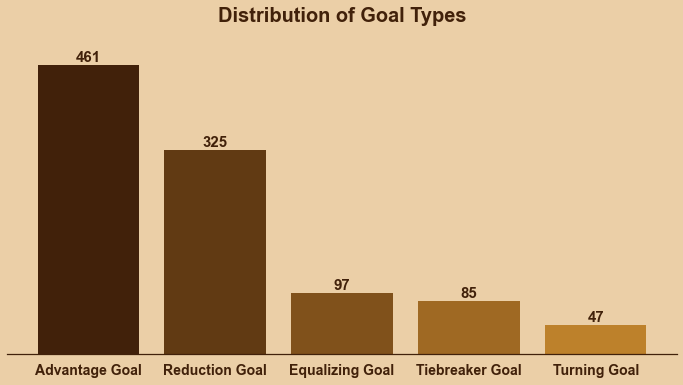

In [36]:
from auxiliary_functions import plot_goal_type

plot_goal_type(goal_type_counts)

<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">      
    
<p style="background-color:#41210A; font-family:Montserrat; font-size:100%; text-align:left; border-radius:0px 10px 10px 0px; padding-left: 50px; width: 50%;"><strong><span style="color:#FBB03B">Goal Timing</span></strong></p> 


- **To analyze the timing of goals scored during a match, I’ve classified the game into three segments:**

  
- **Beginning - 0 to 19 minutes**
- **Middle - 20 to 39 minutes**
- **End - 40+ minutes**
</div>    

In [37]:
# Creating "Game Segment" column
df.loc[df['Minute'] < 20, 'Game Segment'] = "Beginning"
df.loc[(df['Minute'] >= 20) & (df['Minute'] < 40), 'Game Segment'] = "Middle"
df.loc[df['Minute'] >= 40, 'Game Segment'] = "End"

# Group by Game Segment and count occurrences of each category
segment_counts = df['Game Segment'].value_counts()

# Reorder the segments as Beginning, Middle, End
ordered_segments = ['Beginning', 'Middle', 'End']
segment_counts = segment_counts.reindex(ordered_segments)

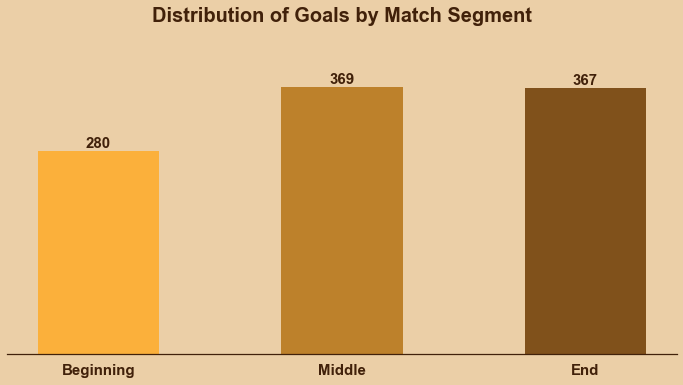

In [38]:
from auxiliary_functions import plot_goal_time

plot_goal_time(segment_counts)

<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">
    
- **It is very noticeable that fewer goals are scored in the first 20 minutes compared to the other two stages of the match. From my experience, I would attribute this to two main reasons:**
    

- **1 - Physical Fitness: At the beginning of the match, all players are well-rested, which reduces the rate of errors that lead to goals. In the later stages, fatigue affects the players' performance, creating more opportunities for goals.**

- **2 - Motivation and Balance: The start of a match tends to be more balanced, with neither team gaining a clear advantage, even if the quality of the teams is uneven. In the later stages, one team might establish a significant lead, causing the losing team to feel demotivated and less capable of closing the gap.**    
</div>        

<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">

## <p style="background-color:#41210A; font-family:Montserrat; color:#FBB03B; font-size:150%; text-align:left; margin-bottom: 0px; padding-left: 75px;"><strong>10. TOP INDIVIDUAL PERFORMANCES</strong></p> 
    
- **In this section, I will plot the top 10 individual performances based on the total number of goals and assists achieved in a single match.**
</div>        

In [39]:
# Create a new DataFrame grouping by date and scorer, summing the count
new_df = df.groupby(['Date', 'Scorer']).agg({'Count': 'sum'}).reset_index()

# Get the top 5 rows with the highest number in the 'Count' column
top_10_scorers = new_df.nlargest(10, 'Count')

# Format the 'Date' column to Day - Month - Year
top_10_scorers['Date'] = top_10_scorers['Date'].dt.strftime('%d/%m/%Y')

# Rename the 'Count' column to 'Number of Goals'
top_10_scorers = top_10_scorers.rename(columns={'Count': 'Number of Goals'})

# Create a new DataFrame grouping by date and assistant, summing the count
new_df = df.groupby(['Date', 'Assistant']).agg({'Count': 'sum'}).reset_index()

# Drop the row where 'Assistant' is '-'
new_df = new_df.drop(new_df[new_df['Assistant'] == '-'].index)

# Get the top 5 rows with the highest number in the 'Count' column
top_10_assistants = new_df.nlargest(10, 'Count')

# Format the 'Date' column to Day - Month - Year
top_10_assistants['Date'] = top_10_assistants['Date'].dt.strftime('%d/%m/%Y')

# Rename the 'Count' column to 'Number of Assists'
top_10_assistants = top_10_assistants.rename(columns={'Count': 'Number of Assists'})


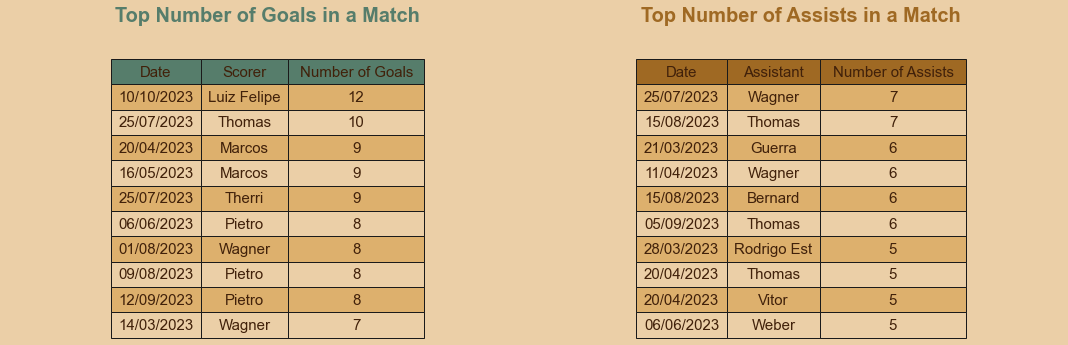

In [40]:
from auxiliary_functions import plot_top_performances

plot_top_performances(top_10_scorers, top_10_assistants)

<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">

## <p style="background-color:#41210A; font-family:Montserrat; color:#FBB03B; font-size:150%; text-align:left; margin-bottom: 0px; padding-left: 75px;"><strong>11. INDIVIDUAL PLAYER ANALYSIS</strong></p> 
    
- **In this stage, I will emphasize an individual analysis by selecting a player and examining their statistics throughout the 2023 season.**
</div>        

In [41]:
# Choose the player to analyze
chosen_player = input('Which player would you like to analyze? ')

# Data
num_games = df_players.loc[df_players['Player'] == chosen_player]['Matches'].values[0]
wins = df_players.loc[df_players['Player'] == chosen_player]['Wins'].values[0]
losses = df_players.loc[df_players['Player'] == chosen_player]['Losses'].values[0]
draws = df_players.loc[df_players['Player'] == chosen_player]['Draws'].values[0]
goals_scored = df_scorer.loc[df_scorer['Player'] == chosen_player]['Goals'].values[0]
assists = df_assistants.loc[df_assistants['Player'] == chosen_player]['Assists'].values[0]
points = df_players.loc[df_players['Player'] == chosen_player]['Points'].values[0]
efficiency = df_players.loc[df_players['Player'] == chosen_player]['Efficiency'].values[0]
participations = goals_scored + assists

Which player would you like to analyze? Thomas


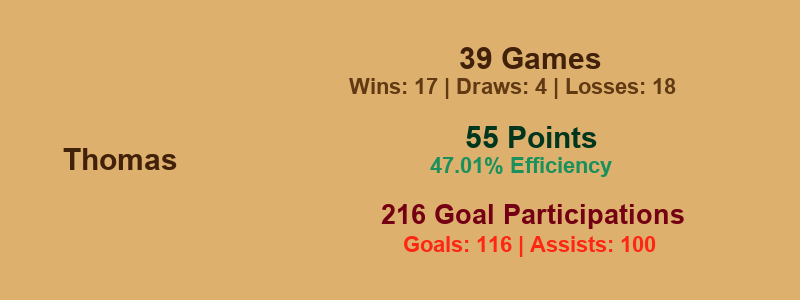

In [42]:
from auxiliary_functions import plot_player_stats

plot_player_stats(chosen_player, num_games, wins, draws, losses, points, efficiency, participations, goals_scored, assists)

<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">      
    
<p style="background-color:#41210A; font-family:Montserrat; font-size:100%; text-align:left; border-radius:0px 10px 10px 0px; padding-left: 50px; width: 50%;"><strong><span style="color:#FBB03B">Player Position in Season Standings</span></strong></p>
</div>        

In [43]:
# Function to get the rows above and below the player
def get_adjacent_rows(df, player):
    # Find the index of the player
    player_index = df[df['Player'] == chosen_player].index

    if len(player_index) > 0:
        player_index = player_index[0]

        # Get the rows above and below the player
        adjacent_rows = df.iloc[max(0, player_index - 2):min(player_index + 3, len(df))]
        return adjacent_rows
    else:
        return pd.DataFrame()  # Returns an empty DataFrame if the player is not found
    
# Create new DataFrames
df_players = df_players.reset_index()
df_players = df_players.drop(columns=['index'])
df_player_adjacent_points = get_adjacent_rows(df_players, chosen_player)

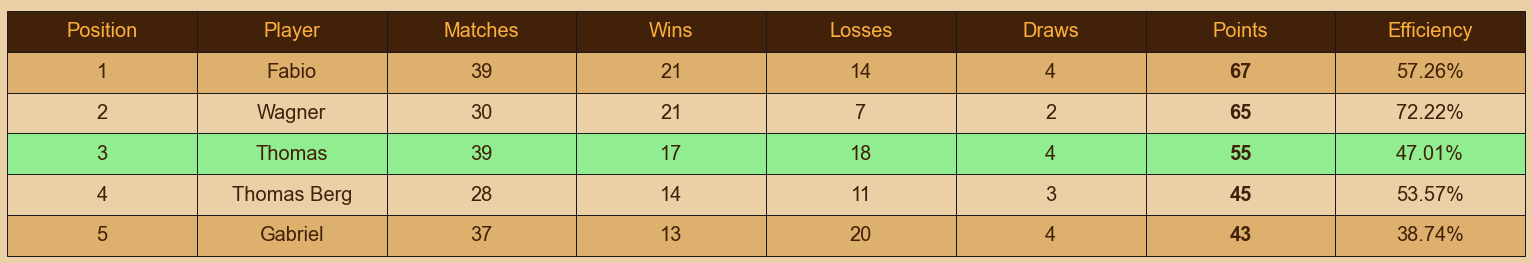

In [44]:
from auxiliary_functions import plot_player_classification

plot_player_classification(df_player_adjacent_points, chosen_player)

<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">      
    
<p style="background-color:#41210A; font-family:Montserrat; font-size:100%; text-align:left; border-radius:0px 10px 10px 0px; padding-left: 50px; width: 50%;"><strong><span style="color:#FBB03B">Player's Position in the Top Scorers and Assists Tables</span></strong></p>
</div>        

In [45]:
# Create a DataFrame with the rows above and below the player for df_assistants
df_player_adjacent_assists = get_adjacent_rows(df_assistants, chosen_player)

# Create a DataFrame with the rows above and below the player for df_scorer
df_player_adjacent_scorers = get_adjacent_rows(df_scorer, chosen_player)

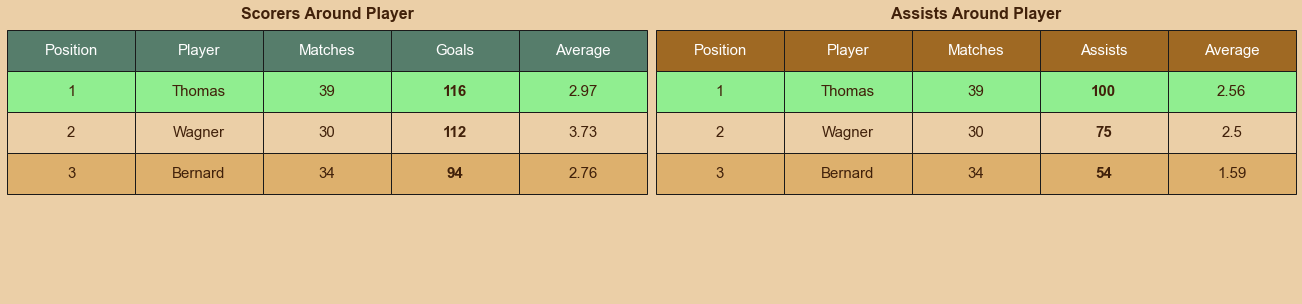

In [46]:
from auxiliary_functions import plot_player_goals_assits_classification

plot_player_goals_assits_classification(df_player_adjacent_scorers, df_player_adjacent_assists, chosen_player)

<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">      
    
<p style="background-color:#41210A; font-family:Montserrat; font-size:100%; text-align:left; border-radius:0px 10px 10px 0px; padding-left: 50px; width: 50%;"><strong><span style="color:#FBB03B">Player's Best Performances</span></strong></p>
</div>        

In [47]:
# Create a new DataFrame by grouping by date and scorer and summing the count
new_df = df.groupby(['Date', 'Scorer']).agg({'Count': 'sum'}).reset_index()

# Filter the rows where the scorer is "player"
new_df = new_df.loc[new_df['Scorer'] == chosen_player]

# Get the top 5 rows with the highest number in the 'Count' column
top_5_scorer_games = new_df.nlargest(5, 'Count')

# Format the 'Date' column to Day - Month - Year
top_5_scorer_games['Date'] = top_5_scorer_games['Date'].dt.strftime('%d/%m/%Y')

# Rename the 'Count' column to 'Goals'
top_5_scorer_games = top_5_scorer_games.rename(columns={'Count': 'Number of Goals'})


# Create a new DataFrame by grouping by date and assistant and summing the count
new_df = df.groupby(['Date', 'Assistant']).agg({'Count': 'sum'}).reset_index()

# Use the drop method to remove rows where the assistant is '-'
new_df = new_df.drop(new_df[new_df['Assistant'] == '-'].index)

# Filter the rows where the assistant is "player"
new_df = new_df.loc[new_df['Assistant'] == chosen_player]

# Get the top 5 rows with the highest number in the 'Count' column
top_5_assist_games = new_df.nlargest(5, 'Count')

# Format the 'Date' column to Day - Month - Year
top_5_assist_games['Date'] = top_5_assist_games['Date'].dt.strftime('%d/%m/%Y')

# Rename the 'Count' column to 'Assists'
top_5_assist_games = top_5_assist_games.rename(columns={'Count': 'Number of Assists'})

# Check if the player has goals and/or assists
has_goals = not top_5_scorer_games.empty
has_assists = not top_5_assist_games.empty

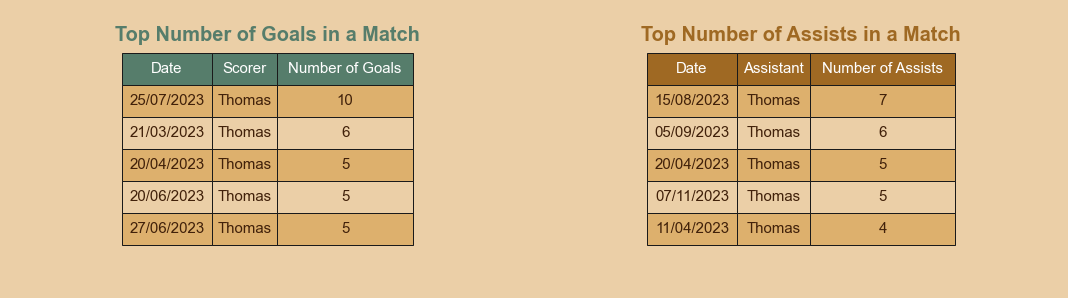

In [48]:
from auxiliary_functions import plot_player_best_performance

plot_player_best_performance(top_5_scorer_games, top_5_assist_games, chosen_player, has_goals, has_assists)

<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">      
    
<p style="background-color:#41210A; font-family:Montserrat; font-size:100%; text-align:left; border-radius:0px 10px 10px 0px; padding-left: 50px; width: 50%;"><strong><span style="color:#FBB03B">Player's Most Frequent Teammates</span></strong></p>

- **Which teammates played the most with the analyzed player?**
</div>        

In [49]:
# Create a list to store rows containing only the player
player_counts = []

# Iterate through relevant columns and check for the exact presence of the player
for _, row in df_vd.iterrows():
    for col in ["Winning Team", "Losing Team", "Draw Team 1", "Draw Team 2"]:
        players = [player.strip() for player in str(row[col]).split(',')]
        if any(player == chosen_player for player in players):
            player_counts.append([p.strip() for p in players if p.strip() != chosen_player])

# Remove the player from the list
player_counts = [player for players in player_counts for player in players]

# Count the frequency of each player
players_count = pd.Series(player_counts).value_counts()

# Get the highest value from players_count
max_value = players_count.max()


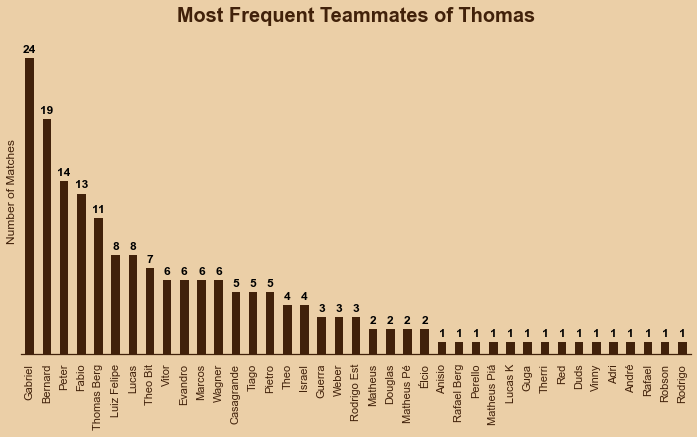

In [50]:
from auxiliary_functions import plot_frequent_teamates

plot_frequent_teamates(players_count, chosen_player, max_value)

<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">      
    
<p style="background-color:#41210A; font-family:Montserrat; font-size:100%; text-align:left; border-radius:0px 10px 10px 0px; padding-left: 50px; width: 50%;"><strong><span style="color:#FBB03B">Performance by Teammate</span></strong></p>

- **Now that we know which teammates played the most with the analyzed player, it’s time to analyze their performance when playing together. This chart will show the number of wins, draws, and losses, as well as the points performance for each teammate.**
</div>        

In [51]:
# Create lists to store players in different situations
winners = []
losers = []
draws = []

# Iterate through relevant columns and check for the exact presence of the player
for _, row in df_vd.iterrows():
    for col in ["Winning Team", "Losing Team", "Draw Team 1", "Draw Team 2"]:
        players = [player.strip() for player in str(row[col]).split(',')]
        if any(player == chosen_player for player in players):
            if col == "Winning Team":
                winners.extend([p.strip() for p in players if p.strip() != chosen_player])
            elif col == "Losing Team":
                losers.extend([p.strip() for p in players if p.strip() != chosen_player])
            elif col in ["Draw Team 1", "Draw Team 2"]:
                draws.extend([p.strip() for p in players if p.strip() != chosen_player])

# Count the frequency of each player in each list
winners_count = pd.Series(winners).value_counts()
losers_count = pd.Series(losers).value_counts()
draws_count = pd.Series(draws).value_counts()

# Create a consolidated DataFrame with the counts
df_plot = pd.DataFrame({
    'Winning Team': winners_count,
    'Losing Team': losers_count,
    'Draw Team': draws_count
}).fillna(0)

# Convert to int
df_plot['Winning Team'] = df_plot['Winning Team'].astype(int)
df_plot['Losing Team'] = df_plot['Losing Team'].astype(int)
df_plot['Draw Team'] = df_plot['Draw Team'].astype(int)

# Create a Games column
df_plot['Games'] = df_plot['Winning Team'] + df_plot['Losing Team'] +  df_plot['Draw Team']

# Create a Points column
df_plot['Points'] = df_plot['Winning Team'] * 3 + df_plot['Draw Team']

# Calculate the "Efficiency" column in the df_plot DataFrame
df_plot['Efficiency'] = (df_plot['Points'] / (df_plot['Games'] * 3)) * 100
df_plot['Efficiency'] = df_plot['Efficiency'].map('{:.0f}%'.format)

players = df_plot.index.tolist()
losses = df_plot['Losing Team'].tolist()
draws = df_plot['Draw Team'].tolist()
wins = df_plot['Winning Team'].tolist()
efficiency = df_plot['Efficiency'].tolist()
games = df_plot['Games'].tolist()

# Get the maximum value from the list of games
max_games = max(games)

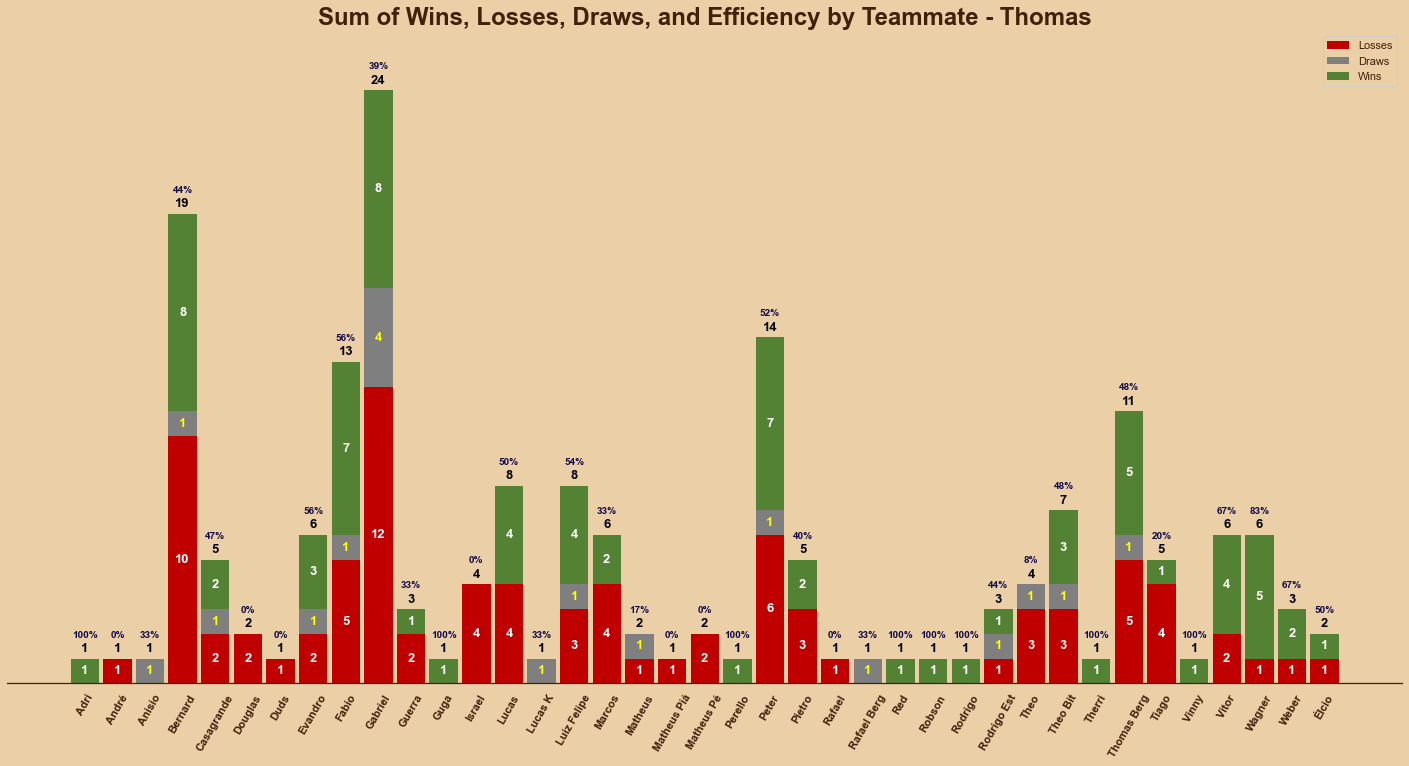

In [52]:
from auxiliary_functions import plot_win_lose_teamate

plot_win_lose_teamate(players, losses, draws, wins, games, efficiency, max_games, chosen_player)

<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">

## <p style="background-color:#41210A; font-family:Montserrat; color:#FBB03B; font-size:150%; text-align:left; margin-bottom: 0px; padding-left: 75px;"><strong>12. PLAYER'S GOALS AND ASSISTS ANALYSIS</strong></p> 
    
- **Note that the goals and assists from 3 matches are not considered in this analysis.**
     
    
<p style="background-color:#41210A; font-family:Montserrat; font-size:100%; text-align:left; border-radius:0px 10px 10px 0px; padding-left: 50px; width: 50%;"><strong><span style="color:#FBB03B">Direct Goal Involvement</span></strong></p>

- **Now, let's examine how the player's goals and assists are distributed in terms of their total direct contributions to goals.**
</div>        

In [53]:
# Filter the DataFrame
df_player = df[(df['Scorer'] == chosen_player) | (df['Assistant'] == chosen_player)]
df_player_goals = df[df['Scorer'] == chosen_player]
df_player_assists = df[df['Assistant'] == chosen_player]

# Filter the DataFrame for Scorer
df_scorer = df_player[df_player['Scorer'] == chosen_player]

# Filter the DataFrame for Assistant
df_assistant = df_player[df_player['Assistant'] == chosen_player]

# Group and count the occurrence of each category in the subsets
df_scorer_counts = df_scorer.Scorer.count()
df_assistant_counts = df_assistant.Assistant.count()

# Calculate the percentage
total_counts = df_scorer_counts + df_assistant_counts
percentage_scorer = (df_scorer_counts / total_counts) * 100
percentage_assistant = (df_assistant_counts / total_counts) * 100

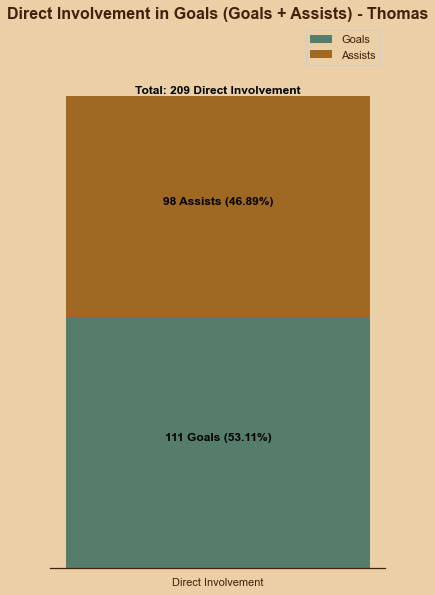

In [54]:
from auxiliary_functions import plot_player_involvement

plot_player_involvement(df_scorer_counts, df_assistant_counts, total_counts, percentage_assistant, percentage_scorer, chosen_player)

<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">      
    
<p style="background-color:#41210A; font-family:Montserrat; font-size:100%; text-align:left; border-radius:0px 10px 10px 0px; padding-left: 50px; width: 50%;"><strong><span style="color:#FBB03B">Goal Involvement by Game Time</span></strong></p>

- **What is the segment of the match during which the player is most frequently involved in goals?**
</div>        

In [55]:
# Map points to numeric values
points_mapping = {'Beginning': 1, 'Middle': 2, 'End': 3}

# Group by Game Part and count the occurrence of each category
part_counts = df_player['Game Segment'].value_counts()
part_counts_goals = df_player_goals['Game Segment'].value_counts()
part_counts_assists = df_player_assists['Game Segment'].value_counts()

# Map points to numeric values in the indices
part_counts.index = part_counts.index.map(points_mapping)
part_counts_goals.index = part_counts_goals.index.map(points_mapping)
part_counts_assists.index = part_counts_assists.index.map(points_mapping)

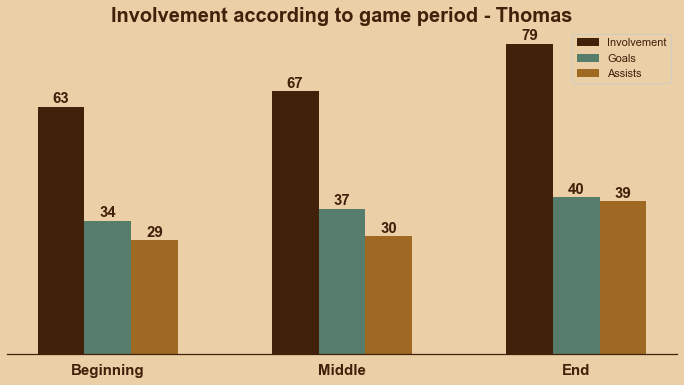

In [56]:
from auxiliary_functions import plot_player_involvement_period

plot_player_involvement_period(part_counts, part_counts_goals, part_counts_assists, chosen_player, points_mapping)

<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">      
    
<p style="background-color:#41210A; font-family:Montserrat; font-size:100%; text-align:left; border-radius:0px 10px 10px 0px; padding-left: 50px; width: 50%;"><strong><span style="color:#FBB03B">Player's Goal Involvement Characteristics</span></strong></p>

- **What are the characteristics of the goals in which the player was involved?**
    
</div>        

In [57]:
# Map points to numeric values
points_mapping = {'Advantage Goal': 1, 'Reduction Goal': 2, 'Equalizing Goal': 3, 'Tiebreaker Goal': 4, 'Turning Goal': 5}

# Group by Game Part and count the occurrence of each category
part_counts = df_player['Goal Type'].value_counts()
part_counts_goals = df_player_goals['Goal Type'].value_counts()
part_counts_assists = df_player_assists['Goal Type'].value_counts()

# Map points to numeric values in the indices
part_counts.index = part_counts.index.map(points_mapping)
part_counts_goals.index = part_counts_goals.index.map(points_mapping)
part_counts_assists.index = part_counts_assists.index.map(points_mapping)

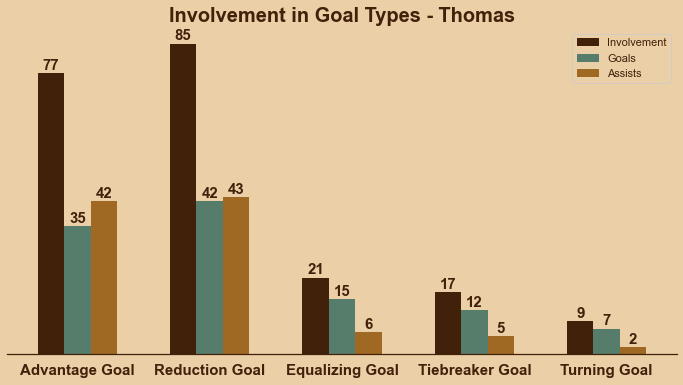

In [58]:
from auxiliary_functions import plot_player_involviment_type

plot_player_involviment_type(part_counts, part_counts_goals, part_counts_assists, chosen_player, points_mapping)

<div style="font-family: Montserrat; color:#41210A; background-color:#EBCFA7;">      
    
<p style="background-color:#41210A; font-family:Montserrat; font-size:100%; text-align:left; border-radius:0px 10px 10px 0px; padding-left: 50px; width: 50%;"><strong><span style="color:#FBB03B">Player's Assists Characteristics</span></strong></p>

- **Next, we will examine the following aspects of the player's performance: assists received that led to goals, assists provided to teammates resulting in goals, and goals scored by the player independently, without relying on assists.**
    
</div>        

In [59]:
# Filter the DataFrame
df_player = df[(df['Scorer'] == chosen_player) | (df['Assistant'] == chosen_player)]
df_player_goals = df[df['Scorer'] == chosen_player]
df_player_assists = df[df['Assistant'] == chosen_player]

# Filter the DataFrame for Scorer
df_scorer = df_player[df_player['Scorer'] == chosen_player]

# Filter the DataFrame for Assistant
df_assistant = df_player[df_player['Assistant'] == chosen_player]

# Data for the first chart
df_scorer_assist_req = df_scorer[df_scorer['Assistant'] != '-']
assistant_counts_scorer = df_scorer_assist_req['Assistant'].value_counts()

# Data for the second chart
df_no_assistant = df_scorer[df_scorer['Assistant'] == '-']
no_assistant_counts = df_no_assistant['Scorer'].value_counts()

# Data for the third chart
assistant_counts_assistant = df_assistant['Scorer'].value_counts()

# Find the highest number in the two datasets
max_value_scorer = assistant_counts_scorer.max()
max_value_no_assist = no_assistant_counts.max()
max_value_assistant = assistant_counts_assistant.max()

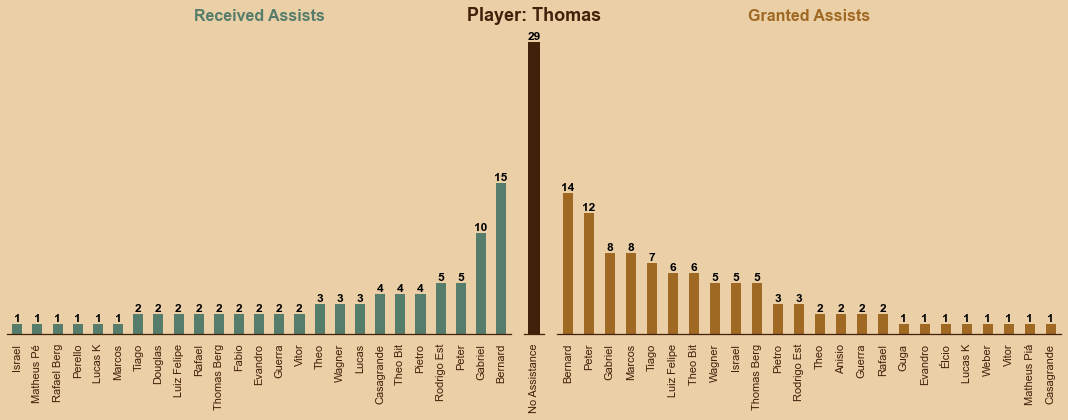

In [60]:
from auxiliary_functions import plot_player_assists_teamates

plot_player_assists_teamates(assistant_counts_scorer, no_assistant_counts, assistant_counts_assistant, chosen_player)